In [20]:
import pandas as pd

In [115]:
appliance_homes={"hvac":33,"fridge":21,"dr":26,"wm":16,"dw":32,"light":12}

In [127]:
appliances = ["hvac","fridge","dr"]
out = {}
count=0
for appliance in appliances:
    out[appliance]={}
    for feature in ["Monthly","Static", "Monthly+Static"]:
        out[appliance][feature]={}
        appliance_max =appliance_homes[appliance]
        for num_homes in range(7, appliance_max, 2):
            out[appliance][feature][num_homes] = {}
            t = []
            for start_seed in range(0, 100, 1):
                stop_seed = start_seed+1
                try:
                    t.append(pd.read_csv("../sensitivity-data-new/%s_%d_%d_%d_%s.csv" %(appliance, 
                                                                               num_homes, 
                                                                               start_seed, 
                                                                              stop_seed,
                                                                              feature), index_col=0,header=None, names=['a'] ))
                except:
                    count=count+1
            out[appliance][feature][num_homes] = pd.concat(t)

In [128]:
import matplotlib.pyplot as plt

In [129]:
%matplotlib inline

In [130]:
means = {}
sems = {}
for appliance in ["hvac","fridge","dr"]:
    means[appliance] = {}
    sems[appliance] = {}
    for feature in ["Monthly","Static", "Monthly+Static"]:
        means[appliance][feature] ={}
        sems[appliance][feature] ={}
        appliance_max =appliance_homes[appliance]
        for num_homes in range(7, appliance_max, 2):
            means[appliance][feature][num_homes] = out[appliance][feature][num_homes].mean(axis=1).mean()
            sems[appliance][feature][num_homes] = out[appliance][feature][num_homes].mean(axis=1).sem()

In [36]:
from common_functions import latexify, format_axes

In [37]:
latexify()

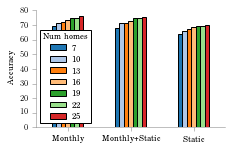

In [29]:
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
pd.DataFrame(means["hvac"]).T.plot(kind='bar',rot=0, colors=tableau20blind)
plt.ylim((0, 80))
format_axes(plt.gca())
plt.legend(loc=3, title="Num homes")
plt.ylabel("Accuracy")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.pdf", bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.png", bbox_inches="tight")

In [79]:
means_df

,Monthly,Monthly+Static,Static
7,25.936079,25.943477,27.151478
9,26.685064,27.100271,28.557357
11,27.407248,27.527753,28.975400
13,27.142758,28.603932,28.966423
15,27.599754,28.715838,29.398895
17,27.574940,29.279419,28.659488
19,28.274172,29.397587,30.722613
21,28.028443,30.303305,30.744679
23,29.004356,29.546032,29.800958
25,29.461681,28.145256,31.245398


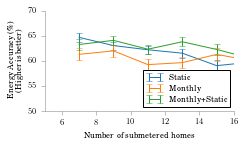

In [111]:
latexify(fig_height=1.8)
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

means_df = pd.DataFrame(means["fridge"])
sems_df = pd.DataFrame(sems["fridge"])
for i, feature in enumerate(["Static", "Monthly","Monthly+Static"]):
    plt.errorbar(means_df[feature].index, means_df[feature].values, 
                 yerr=sems_df[feature].values, label=feature, color=tableau20blind[i*2])
#.plot(kind='line',rot=0, colors=tableau20blind[::2])
plt.ylim((0, 80))
format_axes(plt.gca())
plt.legend(loc=4)
#plt.ylim((62, 78))
plt.ylim((50, 70))
plt.xlim((5, appliance_max))
plt.ylabel("Energy Accuracy (\%)\n(Higher is better)")
plt.xlabel("Number of submetered homes")
#plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes-hvac.pdf", bbox_inches="tight")
#plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes-hvac.png", bbox_inches="tight")

In [92]:
sems['hvac']['Monthly']

{7: 0.45185100806773892,
 9: 0.4455127877814557,
 11: 0.41592129134635147,
 13: 0.45073338132316965,
 15: 0.37668280706990787,
 17: 0.37915446091409583,
 19: 0.43539880015088689,
 21: 0.44014443035207079,
 23: 0.4940711332199797,
 25: 0.51427364000010312,
 27: 0.61350635409438314,
 29: 0.74613069314412717,
 31: 0.99494621148957096}

In [94]:
to_use_feature = {'dr': 'Monthly+Static',
 'dw': 'Monthly+Static',
 'fridge': 'Monthly+Static',
 'hvac': 'Monthly',
 'light': 'Static',
 'wm': 'Static'}

In [103]:
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}

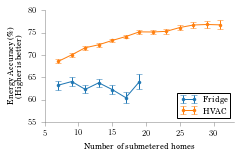

In [134]:
latexify(fig_height=2)
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

for i, appliance in enumerate(["fridge","hvac"]):
    means_df = pd.DataFrame(means[appliance])
    sems_df = pd.DataFrame(sems[appliance])
    feature = to_use_feature[appliance]
    plt.errorbar(means_df[feature].index, means_df[feature].values, marker='.',
                 yerr=sems_df[feature].values, label=appliance_name_map[appliance], color=tableau20blind[i*2])
#.plot(kind='line',rot=0, colors=tableau20blind[::2])
plt.ylim((0, 80))
format_axes(plt.gca())
plt.legend(loc=4)
#plt.ylim((62, 78))
plt.ylim((55, 80))
plt.xlim((5, 33))
plt.ylabel("Energy Accuracy (\%)\n(Higher is better)")
plt.xlabel("Number of submetered homes")
#plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.pdf", bbox_inches="tight")
#plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.png", bbox_inches="tight")